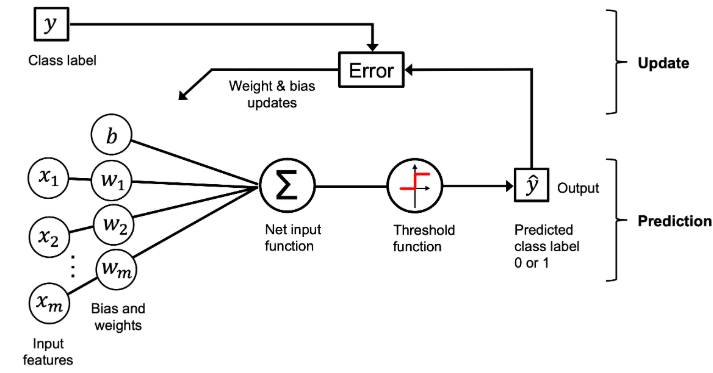

# 퍼셉트론
```
가장 기본적인 인공신경망 - 이진분류기
1. 입력과 가중치의 선형 결합
2. 그 결과에 계단함수를 적용
3. 예측값과 실제값의 차이를 바탕으로 가중치와 바이어스를 조정
```
$$z = \sum_{i=1}^{n} w_i x_i + b
$$
```
계단함수
```
$$\hat{y} = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{otherwise}
\end{cases}
$$
```
가중치 업데이트
```
$$w_i \leftarrow w_i + \eta (y - \hat{y}) x_i$$
$$b \leftarrow b + \eta (y - \hat{y})
$$

In [ ]:
import numpy as np
rgen = np.random.RandomState(42)
w = rgen.normal(loc=0.0, scale=0.01, size=10)
b = np.float64(0.)
w,b

(array([ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
        -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ]),
 np.float64(0.0))

In [ ]:
class Perceptron:
  def __init__(self, eta=0.01, n_iter=10, random_state= 1):
    self.eta = eta   # 학습률
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    # 가중치와 편향은 랜덤한 값
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # 정규분포의 평균, 정규 분포의 표준편차
    self.b_ = np.float64(0.)
    self.errors_ = []
    # 학습횟수 만큼 순환
    for _ in range(self.n_iter):
      errors = 0   # 오류의 개수
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)   # 예측이 잘못 분류 했을 경우
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1,0)

# 데이터 읽기

In [ ]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X[:,2], X[:,3]

(array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
        1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
        1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
        1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
        4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
        4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
        4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
        4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
        5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
        6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
        6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
        5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1]),
 array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
      

# 시각화

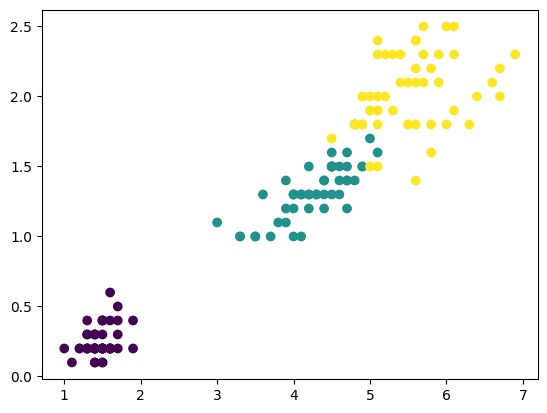

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()

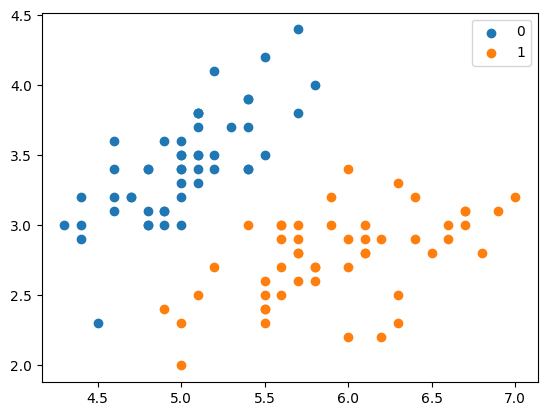

In [ ]:
x0 = X[y==0]
x1 = X[y==1]
plt.scatter(x0[:,0],x0[:,1], label=0)
plt.scatter(x1[:,0],x1[:,1], label=1)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = np.stack((x0,x1)).reshape(-1,4)
y = np.array([0]*len(x0)+[1]*len(x1))
X_tr, X_val, y_tr, y_val = train_test_split(X,y,random_state=42, test_size=0.2)

퍼셉트론 적용하기

In [ ]:
pc = Perceptron()
pc.fit(X_tr, y_tr)
pc.errors_

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
pc.predict(X_val), y_val

(array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]))

# 주요 라이브러리

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# 공개 데이터셋
train_dataset =  datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_dataset =  datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
# 채널정보가 앞에 있다.
data,label = next(iter(train_dataset))
# C, H , W
data.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
# 데이터 로더
batch_size = 64
train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
data, label = next(iter(train_dataloader))
# 64 1 28 28  N,C,H,W
data.shape, label.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [ ]:
import tensorflow as tf
c100 = tf.keras.datasets.cifar100
(X_trin,_),(_,_) = c100.load_data()
X_trin.shape

(50000, 32, 32, 3)

# 다층퍼셉트론(MLP)
```
AND/OR 문제는 선형 결정 경계로 해결 가능 XOR 선형으로 불가능
다층 퍼셉트론
```
$$\mathbf{h} = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)
$$
```
출력층
```
$$\hat{y} = \sigma(\mathbf{W}_2 \mathbf{h} + \mathbf{b}_2)
$$

In [ ]:
import torch
import torch.nn as nn   # tensorflow의 layers와 유사
import torch.optim as optim
# 다층 퍼셉트론..(기존 모델에서 상속받아서)
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # 입력을 2개 받아서 출력을 2개로 하는 히든 레이어
    # 입력을 2개 받아서 출력을 1개로 하는 히든 레이어 --> 출력층
    self.fc1 = nn.Linear(2,2)
    self.fc2 = nn.Linear(2,1)
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
  # 전방계산
  def forward(self,x):
    h = self.relu(self.fc1(x))
    out = self.sigmoid(self.fc2(h))
    return out
# xor data
X = torch.tensor([
 [0. , 0.],[0. , 1.],[1. , 0.],[1. , 1.]
])
y = torch.tensor([[0.],[1.],[1.],[0.]])
# 손실함수 옵티마이저
model = MLP()
criterion = nn.BCELoss()   # binary cross entropy
optimizer = optim.Adam(model.parameters())
# 학습루프
for epoch in range(1000):
  optimizer.zero_grad() # 가중치 자체가 업데이트되는 걸 방지하기 위해서 초기화
  y_pred = model(X) # 예측값  내부에서 forward가 수행
  loss = criterion(y_pred,y) # 손실함수를 이용한 오차를 계산
  loss.backward() # 오차의 미분만큼 업데이트 하기 위해서
  optimizer.step() # 가중치 업데이트 발생
  if epoch % 100 ==0:
    print(f'epoch {epoch} loss {loss.item()}')

epoch 0 loss 0.7269118428230286
epoch 100 loss 0.7106344699859619
epoch 200 loss 0.7005731463432312
epoch 300 loss 0.6922078132629395
epoch 400 loss 0.6825289130210876
epoch 500 loss 0.6676566004753113
epoch 600 loss 0.6451765298843384
epoch 700 loss 0.6174576282501221
epoch 800 loss 0.5940132141113281
epoch 900 loss 0.5749386548995972


In [ ]:
with torch.no_grad():  # 역전파를 방지
   for i in range(4):
    pred = model(X[i])
    print(f'입력 : {X[i]} 예측 : {pred.item():.4f}')

입력 : tensor([0., 0.]) 예측 : 0.4323
입력 : tensor([0., 1.]) 예측 : 0.4323
입력 : tensor([1., 0.]) 예측 : 0.7673
입력 : tensor([1., 1.]) 예측 : 0.4323


# 토치로 데이터 로드해서 적용해 보기

모델 생성
```
선형레이어
활성화 함수 렐루
선형레이어
활성화 함수 렐루
선형레이어
활성화 함수 소프트맥스 : 파이토치에서는 사용 안함 -> nn.CrossEntropyLoss 내부적으로 logsoftmax, mllosss를 결합한 상태로 구현되어 있음
```

In [ ]:
bacth_size =64
# 공개 데이터셋
train_dataset =  datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)
test_dataset =  datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)
train_dataloader =  DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
class NeuralNetwork(nn.Module):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 512)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(512, 256)
    self.relu2 = nn.ReLU()
    self.out = nn.Linear(256, 10)
  def forward(self, x):
    x = self.flatten(x)  # nn.Flatten()(x)
    x = self.relu1(self.fc1(x))
    x = self.relu2(self.fc2(x))
    return self.out(x)

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=256, out_features=10, bias=True)
)


학습
```
손실함수
옵티마이져
```

In [ ]:
criterion = nn.CrossEntropyLoss()  # 내부에 softmax가 적용
optim = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def train(dataloader, model, criterion, optim):
  for idx, (X,y) in enumerate(dataloader):   # 64,1,28,28
    pred = model(X)   # 예측
    loss = criterion(pred, y)   # 손실(기울기 계산)
    loss.backward()   # 기울기 적용
    optim.step()   # 업데이트
    optim.zero_grad()   # 가중치 초기화
    if idx % 100 == 0:
      print(f'loss {loss.item()}')
def test(dataloader, model, criterion):
  test_loss = 0
  correct = 0
  with torch.no_grad():  # 가중치 업데이트 방지
    for X,y in dataloader:
      pred = model(X)
      test_loss += criterion(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()  #torch.float[0.25] -- 0.25
  print(f"test loss avg {test_loss / len(dataloader)} accuracy = {correct}")

In [ ]:
len(train_dataset), len(train_dataloader), len(train_dataloader.dataset)

(60000, 938, 60000)

In [ ]:
test_loss = 0
correct = 0
with torch.no_grad():
    for X,y in train_dataloader:
      pred = model(X)
      test_loss += criterion(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()  #torch.float[0.25] -- 0.25
test_loss,   correct

(2165.827460050583, 2981.0)

In [ ]:
epochs = 5
for epoch in range(epochs):
  print(f"epoch {epoch}")
  train(train_dataloader, model, criterion, optim)
  test(test_dataloader, model, criterion)

epoch 0
loss 2.302518844604492
loss 2.193389654159546
loss 1.9580525159835815
loss 1.6373934745788574
loss 1.3800075054168701
loss 1.1066447496414185
loss 0.9671682119369507
loss 0.8119457960128784
loss 0.989662230014801
loss 0.6366233825683594
test loss avg 0.8241842427071492 accuracy = 6710.0
epoch 1
loss 0.905322253704071
loss 0.7861158847808838
loss 0.6506332755088806
loss 0.7273378372192383
loss 0.6264026165008545
loss 0.4662911891937256
loss 0.8108482360839844
loss 0.8040263652801514
loss 0.556841254234314
loss 0.843754768371582
test loss avg 0.6465103022611824 accuracy = 7712.0
epoch 2
loss 0.6555006504058838
loss 0.6640525460243225
loss 0.6833209991455078
loss 0.6111549139022827
loss 0.48448655009269714
loss 0.5518966317176819
loss 0.45030614733695984
loss 0.6256504654884338
loss 0.736554741859436
loss 0.5134752988815308
test loss avg 0.5766983869349122 accuracy = 7949.0
epoch 3
loss 0.4616590142250061
loss 0.6956909894943237
loss 0.5134968161582947
loss 0.657719612121582
loss 

모델 저장하기

In [ ]:
torch.save(model.state_dict(),'model.pth')  # 모델의 매개변수 포함해서 내부상태 사전형태로 직렬화

모델 불러오기

In [ ]:
# 모델 구조를 다시 만들고 상태사전을 결합
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

# 예측

In [ ]:
# 평가를 할때는
# model.eval()   # 평가모드
# torch.no_grad()

# Dropout BatchNormal 활성화를 막는 역할
# 동일한 결과를 내기 위해서
# 기울기계산을 위한 추가적인 메모리를 사용 안하게됨

model.eval()
X,y = train_dataset[0][0], train_dataset[0][1]
with torch.no_grad():
  X = X.to(device)
  pred = model(X)
  print(np.argmax(pred).item(),y)

9 9


# 텐서

In [ ]:
import numpy as np
list1 = [1,2,3,4,5,6]
numpy1 = np.array(list1)
tensor1 = torch.tensor(list1)
list1, numpy1, tensor1

([1, 2, 3, 4, 5, 6], array([1, 2, 3, 4, 5, 6]), tensor([1, 2, 3, 4, 5, 6]))

# 다른 텐서로부터 생성

In [ ]:
x_ones = torch.ones_like(tensor1)
x_ones

tensor([1, 1, 1, 1, 1, 1])

In [ ]:
x_rand = torch.rand_like(tensor1, dtype=torch.float)
x_rand

tensor([0.2378, 0.8760, 0.6368, 0.6634, 0.6389, 0.4452])

In [ ]:
shape = (2,3,)
torch.rand(shape), torch.ones(shape), torch.zeros(shape)

(tensor([[0.0754, 0.7454, 0.9373],
         [0.8749, 0.3837, 0.6649]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

In [ ]:
x_rand.shape, x_rand.dtype, x_rand.device

(torch.Size([6]), torch.float32, device(type='cpu'))

텐서 연산

In [ ]:
x_rand.to('cpu')

tensor([0.2378, 0.8760, 0.6368, 0.6634, 0.6389, 0.4452])

산술연산

In [ ]:
x_rand.T

tensor([0.2378, 0.8760, 0.6368, 0.6634, 0.6389, 0.4452])

In [ ]:
y = torch.tensor([1., 0., 1., 0.]).reshape(-1,2)
y, y.T

(tensor([[1., 0.],
         [1., 0.]]),
 tensor([[1., 1.],
         [0., 0.]]))

In [ ]:
# 두 텐서간의 행렬의 곱
y2 = y@y.T
y3 = y.matmul(y.T)
y2, y3

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[1., 1.],
         [1., 1.]]))

In [ ]:
y*y.T

tensor([[1., 0.],
        [0., 0.]])

넘파이

In [ ]:
y.numpy()

array([[1., 0.],
       [1., 0.]], dtype=float32)

# 사용자 정의 데이터셋

# 사용자 정의 데이터셋
```
def __init__
def __len__
def__getitem__
```

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import re

class CustomDataSet():
  def __init__(self, csv_file, train=True):
    lr = LabelEncoder()
    self.train = train
    self.data = pd.read_csv(csv_file)
    self.data.dropna(inplace=True)
    self.data['분양가격(제곱미터)'] = self.data['분양가격(제곱미터)'].apply(lambda x: re.sub(r'[^0-9]','',x)).replace('',0).astype(float)

    self.data['지역명'] = lr.fit_transform(self.data['지역명'])
    self.data['규모구분'] = lr.fit_transform(self.data['규모구분'])
    self.X = self.data.iloc[:,:-1].to_numpy()
    self.y = self.data.iloc[:,-1].to_numpy()
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, random_state=42, test_size=0.2)
  def __len__(self):
    if self.train:
      return len(self.X_train)
    else:
      return len(self.X_test)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_train[idx]),  torch.FloatTensor(self.y_train[[idx]])[0]
    else:
      return torch.FloatTensor(self.X_test[idx]),  torch.FloatTensor(self.y_test[[idx]])[0]

dataset = CustomDataSet('https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/all_house_2.csv')
X,y = next(iter(dataset))
X, y

(tensor([  12.,    3., 2023.,    8.]), tensor(3638.))

데이터 로더

In [ ]:
from torch.utils.data import DataLoader
batch_size = 64
filepath = 'https://raw.githubusercontent.com/sknetworks20250226/AI/refs/heads/main/data/all_house_2.csv'
train_dataset = CustomDataSet(filepath)
test_dataset = CustomDataSet(filepath,train=False)
train_dataloder = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloder = DataLoader(test_dataset, batch_size=batch_size)

데이터순환하기

In [ ]:
len(train_dataset), len(test_dataset)

(6784, 1697)

pytorch 학습
```
for data, label in DataLoader(:
  # 예측값을 계산
  prediction = model(data)
  #  손실을 이용해서 오차 계산
  loss = LossFunction(predcition, label)
  # 오차 역전파
  loss.backward()
  # 신경망의 가중치 업데이트
  optimizer.step()
```

딥러닝 문제 해결 리스트
```
문제에 대한 이해(도메인 지식)
데이터 파악
  입력자료형과 정답 확인
  클래스 간의 불균형 없는지 확인
  누락된데이터 혹은 타입에 맞지 않는 데이터가 포
데이터 전처리
  학습에 필요한 데이터가 부족하면 증강
  정규범위에서 값 맞추기 - 스케일링
신경망 설계
  공간정보 - CNN
  순서정보 - RNN
신경망 학습
  적합한 손실함수 찾기      
  가중치 수정을 위한 최적화 정책 - 옵티마이져(아담)
  신경망의 성능 평가를 위한 평가지표 정하기
손실값이 무한대로 발생했다고 하면
  손실함수 변경해 보기
  데이터에 이상한 값이 있는지 확인
  학습률을 높이기
손실이 0으로 수렴한다면 -- 알아내기 어려움
  데이터가 부족한지 확인
  신경망 크기 줄이기(간소화)    
```

사인함수 예측

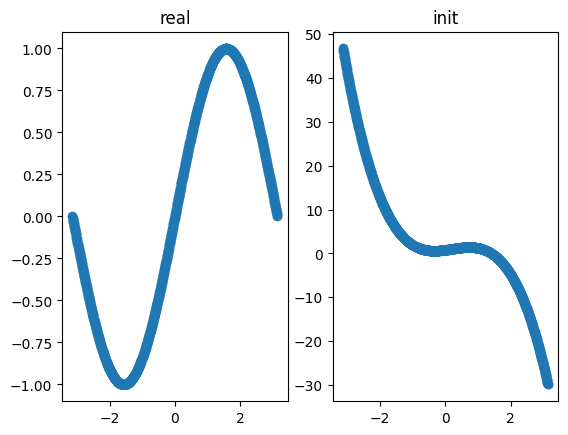

In [ ]:
import math, torch, matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# -pi ~ pi 1000
X = torch.linspace(-math.pi, math.pi, 1000).reshape(-1,1)
y = torch.sin(X)

a =  torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
# 사인함수와 유사한 3차원 공식
y_random = a*X**3 + b*X**2 + c+X + d

plt.subplot(1,2,1)
plt.title('real')
plt.scatter(X,y)

plt.subplot(1,2,2)
plt.title('init')
plt.scatter(X,y_random)

plt.show()

```
풀어야할 다항식
```
$$z = ax^3 + bx^2 + cx + d
$$
```
손실함수
```
$$L = \sum (z - y)^2
$$
```
손실함수 L을 a에 대해서 미분, 연쇄법칙(chain rule)을 사용
```
$$\frac{\partial L}{\partial a} = \sum \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial a}
$$
```
각 항의 도함수(미분)을 계산
```
$$\frac{\partial L}{\partial a} = \sum 2(z - y) \cdot x^3
$$


# 토치를 이용한 경사 하강법

In [ ]:
# 토치를 이용한 경사하강법
# 학습률
lr = 1e-6 # 0.000001
epochs = 2000
for epoch in range(epochs):
  z= a*X**3 + b*X**2 + c*X + d
  loss = ((z-y)**2).sum()
  if epoch % 100 == 0:
    print(f'epoch {epoch} loss {loss.item()}')
  # 손실함수의 미분값인 기울기를
  grad_y_pred = 2.0 * (z - y)
  grad_a = (grad_y_pred* X**3).sum()
  grad_b = (grad_y_pred* X**2).sum()
  grad_c = (grad_y_pred* X).sum()
  grad_d = (grad_y_pred).sum()

  a -= lr*grad_a
  b -= lr*grad_b
  c -= lr*grad_c
  d -= lr*grad_d

epoch 0 loss 310727.21875
epoch 100 loss 1225.3294677734375
epoch 200 loss 1008.651123046875
epoch 300 loss 834.33203125
epoch 400 loss 690.47265625
epoch 500 loss 571.7147216796875
epoch 600 loss 473.65081787109375
epoch 700 loss 392.651123046875
epoch 800 loss 325.727294921875
epoch 900 loss 270.41729736328125
epoch 1000 loss 224.69212341308594
epoch 1100 loss 186.8800506591797
epoch 1200 loss 155.6026153564453
epoch 1300 loss 129.7227783203125
epoch 1400 loss 108.30292510986328
epoch 1500 loss 90.56944274902344
epoch 1600 loss 75.88357543945312
epoch 1700 loss 63.717994689941406
epoch 1800 loss 53.637359619140625
epoch 1900 loss 45.281978607177734


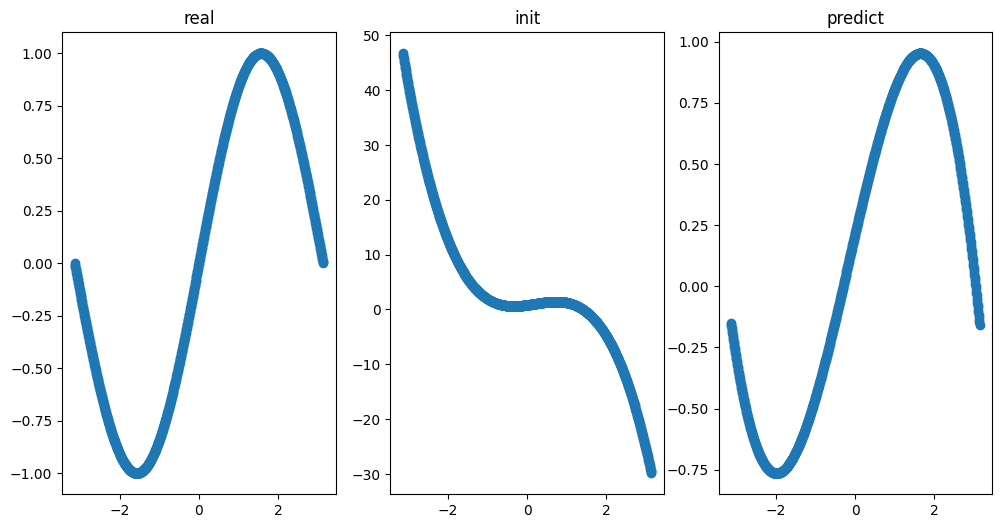

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.title('real')
plt.scatter(X,y)

plt.subplot(1,3,2)
plt.title('init')
plt.scatter(X,y_random)

plt.subplot(1,3,3)
plt.title('predict')
plt.scatter(X,z)

plt.show()

# 토치라이브러리르 이용한 사임함수 예측하기

In [ ]:
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import math, matplotlib.pyplot as plt

class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(-math.pi, math.pi, 1000).reshape(-1,1)
    self.y = torch.sin(X)
  def __len__(self):
    return len(self.X)
  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]
# 모델 정의
class PolyModel(nn.Module):
  # y = a*x**3 + b*x**2 +c*x + d
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.rand(1))
    self.b = nn.Parameter(torch.rand(1))
    self.c = nn.Parameter(torch.rand(1))
    self.d = nn.Parameter(torch.rand(1))
  def forward(self,x):
    return self.a*x**3 + self.b*x**2 + self.c*x + self.d

def train(dataloader, model, criterion, optimizer,epochs):
  for epoch in range(epochs):
    epoch_loss = 0.0
    for idx, (X,y) in enumerate(dataloader):
      pred = model(X)
      loss = criterion(pred, y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      epoch_loss += loss.item()
    if epoch % 100 == 0:
      print(f"epoch {epoch} loss {epoch_loss/len(dataloader)}")

# 데이터 셋, 로더
dataset = SinDataset()
dataloader = DataLoader(dataset, batch_size=100)
# 모델
model = PolyModel()
# 손실함수
criterion = nn.MSELoss()
# 옵티마이저
optimizer = optim.SGD(model.parameters(), lr = 1e-4)
# 학습
train(dataloader, model, criterion, optimizer, 2000)

epoch 0 loss 95.75625024437905
epoch 100 loss 0.027438038628315554
epoch 200 loss 0.02109191003255546
epoch 300 loss 0.01800152496434748
epoch 400 loss 0.015484458196442574
epoch 500 loss 0.013436430040746928
epoch 600 loss 0.011769953055772931
epoch 700 loss 0.01041403440758586
epoch 800 loss 0.009310565097257495
epoch 900 loss 0.00841263539623469
epoch 1000 loss 0.007681921892799437
epoch 1100 loss 0.007087178737856447
epoch 1200 loss 0.006603249872568995
epoch 1300 loss 0.006209292565472424
epoch 1400 loss 0.005888807354494929
epoch 1500 loss 0.005627935333177447
epoch 1600 loss 0.005415595206432045
epoch 1700 loss 0.005242739408276975
epoch 1800 loss 0.005102067510597408
epoch 1900 loss 0.004987607523798942


In [ ]:
# 예측
model.eval()
with torch.no_grad():
  z2 = model(X)

In [ ]:
nn.Parameter(torch.rand(1))

Parameter containing:
tensor([0.1674], requires_grad=True)

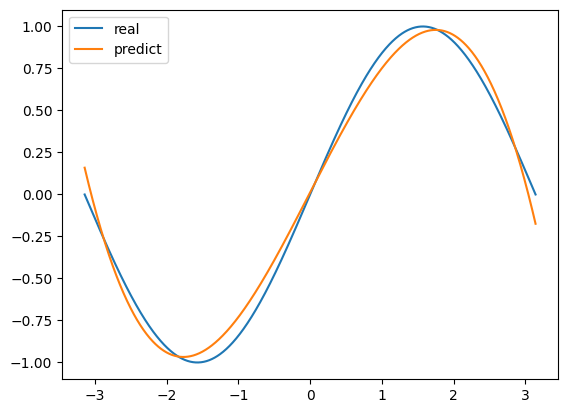

In [ ]:
plt.plot(dataset.X, dataset.y, label='real')
plt.plot(dataset.X, z2, label='predict')
plt.legend()
plt.show()

파이토치를 이용한 보스턴 집값

In [ ]:
import kagglehub
from glob import glob
path = kagglehub.dataset_download("schirmerchad/bostonhoustingmlnd")
print("Path to dataset files:", path)
filepaths = glob(path+'/**/*.*', recursive=True)
filepaths[0]

Path to dataset files: /root/.cache/kagglehub/datasets/schirmerchad/bostonhoustingmlnd/versions/1


'/root/.cache/kagglehub/datasets/schirmerchad/bostonhoustingmlnd/versions/1/housing.csv'

```
데이불러오기-모델정의-[손실계산-오차및역전파]*epocs-종료
```

In [ ]:
df = pd.read_csv(filepaths[0])
df.dropna(inplace=True)
from sklearn.preprocessing import StandardScaler
df.iloc[:,:-1]

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [240]:
# 데이터셋 정의
# 로더를 통해 배치정의 섞고
# 모델을 통해 forward backward step
# 예측 model.eval()  torch.no_grade:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import torch,torch.nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
class BostonDataset(Dataset):
  def __init__(self, csv_file,train=True):
    self.train = train
    self.data = pd.read_csv(csv_file)
    self.data.dropna(inplace=True)
    self.X = self.data.iloc[:,:-1].to_numpy()
    self.y = self.data.iloc[:,-1].to_numpy()
    scaler = StandardScaler()
    self.X_train,self.X_test,self.y_train,self.y_test =  train_test_split(self.X, self.y, random_state=42, test_size=0.2)

    self.X_train = scaler.fit_transform(self.X_train)
    self.X_test = scaler.transform(self.X_test)
  def __len__(self):
    if self.train:
      return len(self.X_train)
    else:
      return len(self.X_test)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_train[idx]), torch.FloatTensor([self.y_train[idx]])
    else:
      return torch.FloatTensor(self.X_test[idx]), torch.FloatTensor([self.y_test[idx]])
# 검증
train_dataset = BostonDataset(filepaths[0])
test_dataset = BostonDataset(filepaths[0],train=False)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64)
data,label = next(iter(train_dataloader))
# 모델 정의
class BostonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(3,64)
    self.linear2 = nn.Linear(64,32)
    self.linear3 = nn.Linear(32,1)
    self.relu = nn.ReLU()
    self.dropput = nn.Dropout(0.2)
  def forward(self, x):
    x = self.dropput( self.relu(self.linear1(x)))
    x = self.dropput(self.relu(self.linear2(x)))
    out = self.linear3(x)
    return out
print('lr=1e-3',1e-3)
#모델 생성
model = BostonModel()
criterion = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.01)
epochs = 200
# train loop
from tqdm import tqdm
# tqdm_iter = tqdm(range(epochs))
for epoch in range(epochs):
  for data, label in train_dataloader:
    optim.zero_grad()  # 업데이트되 가중치가 계속 남이 있는 현상을 방지
    output = model(data) # 예측
    loss = criterion(output,label) # 손실 -- 미분계수가 계산
    loss.backward() # 역전판
    optim.step() # 업데이트
    # tqdm  출력
    # tqdm_iter.set_description(f"epoch {epoch} loss {loss.item()}")
  if epoch % 10 == 0:
    print(f"epoch {epoch} loss {loss.item()}")

lr=1e-3 0.001
epoch 0 loss 178866798592.0
epoch 10 loss 171302158336.0
epoch 20 loss 147335217152.0
epoch 30 loss 89242992640.0
epoch 40 loss 96028065792.0
epoch 50 loss 29038440448.0
epoch 60 loss 23468619776.0
epoch 70 loss 15656712192.0
epoch 80 loss 12971041792.0
epoch 90 loss 9559705600.0
epoch 100 loss 7788644864.0
epoch 110 loss 19932690432.0
epoch 120 loss 5613403648.0
epoch 130 loss 11829919744.0
epoch 140 loss 5108829696.0
epoch 150 loss 17845065728.0
epoch 160 loss 21944627200.0
epoch 170 loss 9115755520.0
epoch 180 loss 6439078912.0
epoch 190 loss 5946048000.0


In [241]:
model.eval()
test_loss = 0.0
all_predics = []
all_labels = []
with torch.no_grad():
  for data, label in test_dataloader:
    data = data.to(device)
    label = label.to(device)
    output = model(data)
    test_loss += criterion(output, label).item()
    all_predics.extend(output.cpu().numpy())
    all_labels.extend(label.cpu().numpy())
  avg_loss = test_loss / len(test_dataloader)
  print(f"test loss {avg_loss}")

test loss 5909752064.0


In [242]:
from sklearn.metrics import r2_score
r2_score(all_predics,all_labels)

0.6542345526179973

In [264]:
# iris 데이터(분류)
from sklearn.datasets import load_iris
import torch, torch.nn, torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

class IrisDataset:
  def __init__(self, train=True):
    self.train = train
    self.X = load_iris().data
    self.y = load_iris().target
    scaler = StandardScaler()
    self.X_tr, self.X_val, self.y_tr, self.y_val = train_test_split(self.X,self.y, random_state=42, stratify=self.y)

    self.X_tr = scaler.fit_transform(self.X_tr)
    self.X_val = scaler.transform(self.X_val)
  def __len__(self):
    if self.train:
      return len(self.X_tr)
    else:
      return len(self.X_val)
  def __getitem__(self, idx):
    if self.train:
      return torch.FloatTensor(self.X_tr[idx]), torch.tensor(self.y_tr[idx], dtype=torch.long)
    else:
      return torch.FloatTensor(self.X_val[idx]), torch.tensor(self.y_val[idx], dtype=torch.long)

# 검증
train_dataset = IrisDataset()
test_dataset = IrisDataset(train=False)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16)
data, label = next(iter(train_dataloader))
print(data.shape, label.shape)

torch.Size([16, 4]) torch.Size([16])
